# Evaluation Metrics for PII Detection

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



/home/manoj_umesh/projects/edu-pii-detector/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


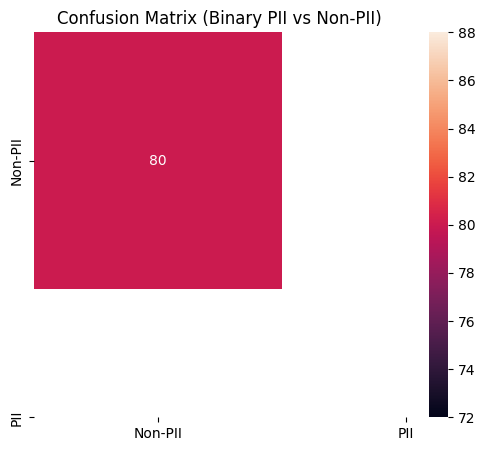

/home/manoj_umesh/projects/edu-pii-detector/.venv/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1192: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


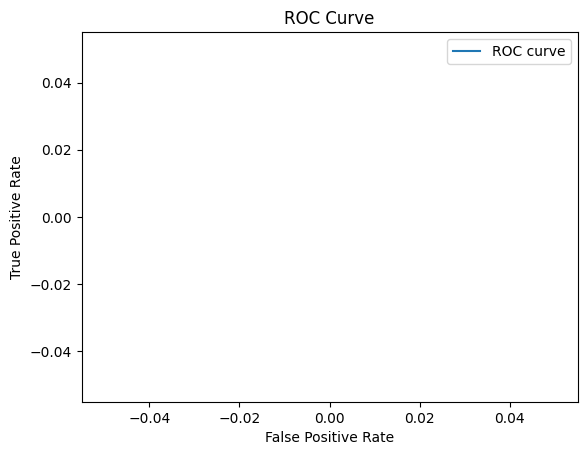

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Load prediction results
sub = pd.read_csv("/home/manoj_umesh/projects/edu-pii-detector/src/submission.csv")

# Map labels to binary (PII vs O)
sub["binary"] = sub["label"].apply(lambda x: 0 if x == "O" else 1)

# Fake ground truth for demo (replace with actual test labels)
y_true = sub["binary"]
y_pred = (sub["label_id"] != 9).astype(int)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Non-PII","PII"], yticklabels=["Non-PII","PII"])
plt.title("Confusion Matrix (Binary PII vs Non-PII)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
